In [1]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
from torchvision.utils import make_grid

from camreid.datamodules.lirmmbase import TripletLIRMMBase256DataModule
from camreid.models.mymodel import MyModel

h = 20
plt.rcParams["figure.figsize"] = (h, h * 8)

C:\Users\jeong\anaconda3\envs\pytorch1_10\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\jeong\anaconda3\envs\pytorch1_10\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
DATA_DIR = fr"C:\Users\jeong\Desktop\machine-learning\image-forensics\practices\cam-reid\data\LIRMMBase256x256"
MODEL_PATH = fr"C:\Users\jeong\Desktop\machine-learning\image-forensics\practices\cam-reid\epoch=64-step=6564.ckpt"

In [3]:
pl.seed_everything(0)
datamodule = TripletLIRMMBase256DataModule(
    data_dir=DATA_DIR, batch_size=8, num_workers=0, persistent_workers=True
)
datamodule.setup()
model = MyModel.load_from_checkpoint(MODEL_PATH)
dataloader = datamodule.train_dataloader()

Global seed set to 0


In [4]:
for batch in dataloader:
    samples, targets = batch
    break
sample_anchor, sample_positive, sample_negative = samples
target_anchor, target_positive, target_negative = targets

In [5]:
content_anchor, fingerprint_anchor = model.encoder(sample_anchor)
content_positive, fingerprint_positive = model.encoder(sample_positive)
content_negative, fingerprint_negative = model.encoder(sample_negative)

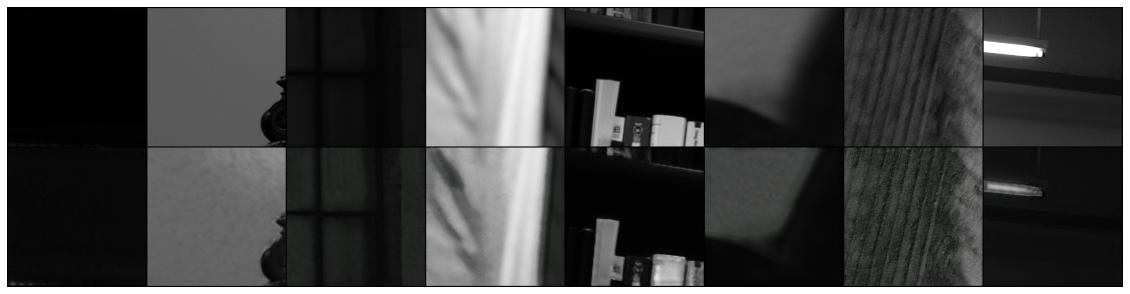

gt:
tensor([1, 1, 1, 3, 2, 1, 5, 2])
pr:
tensor([1, 1, 1, 3, 2, 1, 5, 2])


C:\Users\jeong\anaconda3\envs\pytorch1_10\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [6]:
sample_anchor_re = model.decoder(content_anchor, fingerprint_anchor)
grid = make_grid(
    torch.concat([sample_anchor, sample_anchor_re]),
    datamodule.batch_size,
    normalize=True,
)
plt.axis('off')
plt.imshow(grid.permute(1, 2, 0))
plt.show()

_, fp_re = model.encoder(sample_anchor_re)
target_hat = model.head(fp_re)
print('gt:')
print(target_anchor)
print('pr:')
print(target_hat.argmax(dim=1))

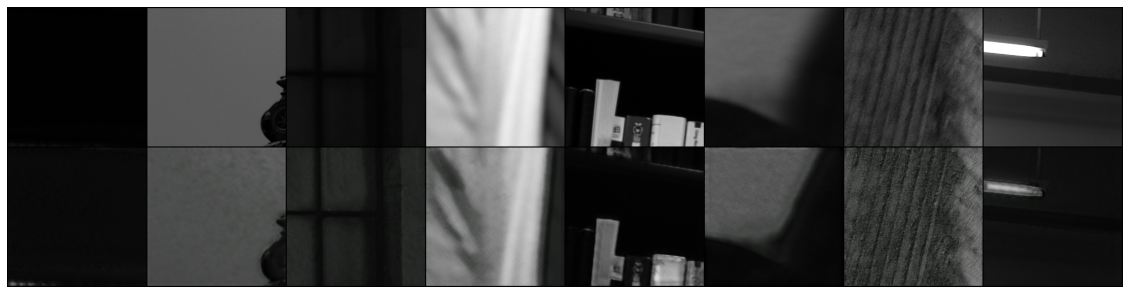

gt:
tensor([1, 1, 1, 3, 2, 1, 5, 2])
pr:
tensor([1, 1, 1, 3, 2, 5, 5, 2])


In [7]:
sample_anchor_re = model.decoder(content_anchor, fingerprint_positive)
grid = make_grid(
    torch.concat([sample_anchor, sample_anchor_re]),
    datamodule.batch_size,
    normalize=True,
)
plt.axis('off')
plt.imshow(grid.permute(1, 2, 0))
plt.show()

_, fp_re = model.encoder(sample_anchor_re)
target_hat = model.head(fp_re)
print('gt:')
print(target_anchor)
print('pr:')
print(target_hat.argmax(dim=1))

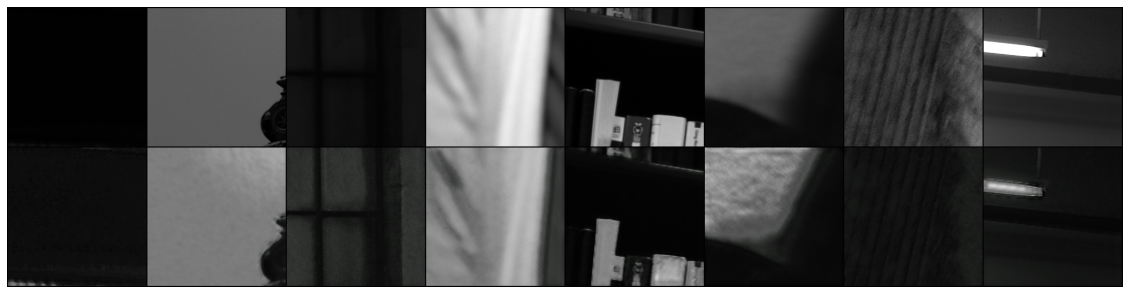

gt anchor:
tensor([1, 1, 1, 3, 2, 1, 5, 2])
gt negative:
tensor([0, 2, 0, 2, 0, 2, 1, 0])
pr:
tensor([0, 2, 5, 2, 0, 2, 1, 5])


In [8]:
sample_anchor_re = model.decoder(content_anchor, fingerprint_negative)
grid = make_grid(
    torch.concat([sample_anchor, sample_anchor_re]),
    datamodule.batch_size,
    normalize=True,
)
plt.axis('off')
plt.imshow(grid.permute(1, 2, 0))
plt.show()

_, fp_re = model.encoder(sample_anchor_re)
target_hat = model.head(fp_re)
print('gt anchor:')
print(target_anchor)
print('gt negative:')
print(target_negative)
print('pr:')
print(target_hat.argmax(dim=1))